# Herd imunity

This notebook shows the concept of herd immunity and its calculation for the disease simulated in the seir model. 

In [1]:
import numpy as np
import matplotlib.pyplot as pyplot
pyplot.rcParams["figure.figsize"]=(12,4)

In [2]:
def sir_calculation(contacts, infection_rate, recovery_rate,simulations=200, population=10_000_000,initialy_infected=1):
    """This function calculates SEIR model"""
    
    susceptiable_people=(population-initialy_infected)
    
    susceptiable = np.zeros([simulations])  #People who can be infected
    infected = np.zeros([simulations])      #Already infected
    recovered = np.zeros([simulations])     #Recovered or dead, cannot be infected again

    
    infected[0] = initialy_infected/ population          
    susceptiable[0] = susceptiable_people/population     

    for t in range(simulations-1):
        infected[t+1]=infected[t]+infected[t]*contacts*infection_rate*susceptiable[t]-recovery_rate*infected[t]
        susceptiable[t+1]=susceptiable[t]-contacts*infection_rate*susceptiable[t]*infected[t]
        recovered[t+1]=recovered[t]+recovery_rate*infected[t]
        
    pyplot.plot(susceptiable,label="Susceptiable")
    pyplot.plot(infected,label="Infected")
    pyplot.plot(recovered,label="Recovered/Dead")

In [3]:
contacts= 3           #How many contacts per day has an average person T
infection_rate=0.10   # Probability of getting infected with contact with an infected person T
recovery_rate = 0.1   #Rate of recovery

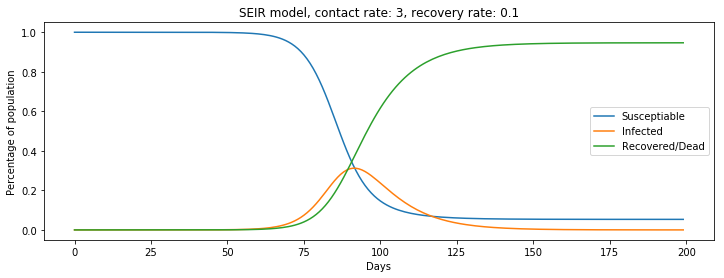

In [4]:
sir_calculation(contacts, infection_rate, recovery_rate)
    
pyplot.legend()
pyplot.title(f"SEIR model, contact rate: {contacts}, recovery rate: {recovery_rate}")
pyplot.gcf().set_size_inches((12, 4))
pyplot.xlabel("Days")
pyplot.ylabel("Percentage of population")
pyplot.show()

In [5]:
def herd_imunity_calculator(contacts, infection_rate, recovery_rate,population=10_000_000, initialy_infected=1):
    
    simulations=10_000  #Here many situations are needed here so that the number of recovered is already final - herd immunity 
    
    susceptiable_people=(population-initialy_infected)
    
    susceptiable = np.zeros([simulations])  #People who can be infected
    infected = np.zeros([simulations])      #Already infected
    recovered = np.zeros([simulations])     #Recovered or dead, cannot be infected again
    
    infected[0] = initialy_infected/ population          
    susceptiable[0] = susceptiable_people/population     

    
    for t in range(simulations-1):
        infected[t+1]=infected[t]+infected[t]*contacts*infection_rate*susceptiable[t]-recovery_rate*infected[t]
        susceptiable[t+1]=susceptiable[t]-contacts*infection_rate*susceptiable[t]*infected[t]
        recovered[t+1]=recovered[t]+recovery_rate*infected[t]
        
    print(f"Herd imunuty for infection rate {infection_rate} is {round(recovered[simulations-1]*100,2)}% infected or imune people")

This section shows the calculated herd immunity for different infection rates 

In [6]:
print("")
print(f"For parameters daily contacts: {contacts}, recovery rate {recovery_rate}")
print("")

infection_rates=[0.09, 0.08, 0.07]

for infection_rate in infection_rates:
    
    herd_imunity_calculator(contacts, infection_rate, recovery_rate)


For parameters daily contacts: 3, recovery rate 0.1

Herd imunuty for infection rate 0.09 is 92.2% infected or imune people
Herd imunuty for infection rate 0.08 is 88.5% infected or imune people
Herd imunuty for infection rate 0.07 is 82.8% infected or imune people
